Equations of motion (2nd order ODEs)
------------------------------------

We know that the motion of an object is determined by Newton’s
equations. In the one-dimensional case, we can define the instantaneous
position $y(t)$, velocity $v(t)$ and acceleration $a(t)$ of an object
using the language of differential calculus: $$v(t)=\frac{dy}{dt},
a(t)=\frac{dv}{dt}.
$$ The motion of the particle is defined by:
$$\frac{d^2y}{dt^2}=\frac{F(t)}{m}$$ This is a second order differential
equation that can written as two first order differential equations:
$$\begin{eqnarray}
\frac{dv}{dt}&=&\frac{F(t)}{m}; \\
\frac{dy}{dt}&=&v(t).\end{eqnarray}$$ To solve it we can apply any of
the methods described in the previous sections. If we pick Euler’s, we
obtain: $$\begin{eqnarray}
v_{n+1}&=&v_n+\frac{F(t)}{m}\Delta t = v_n+a_n\Delta t, \\
y_{n+1}&=&y_n+v_n\Delta t,\end{eqnarray}$$ where $a_n=F(t)/m$.

![forces1](figures/forces1.png).
#### Forces acting on an object: a) moving upward b) falling.

### Exercise 1.2: One dimensional motion
Write a program to solve the 1d equations of motion for a falling
object. Input values: $y_0=y(t=0)$; $v_0=v(t=0)$. Compare results with
different $\Delta t$ and the exact solution. Plot $y(t)$ and $v(t)$. Use
$y_0=10m$; $v_0=0$.





This is a godd time to introduce the concept of **objects** and object oriented programming in Python. We will first define a class "**particle**"

In [34]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt


We are now in position for a free falling particle:

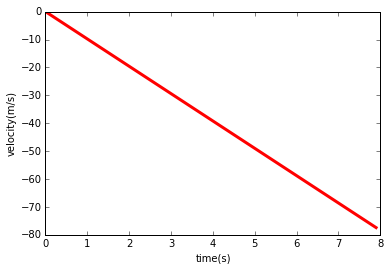

In [35]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity

dt = 0.1           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print i,t_data[i], y_data[i], v_data[i]

pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

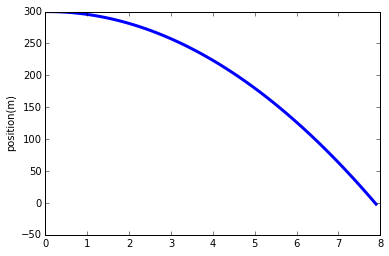

In [36]:
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.ylabel('position(m)');

### Exercise 1.3: Air resistance 
The form of the velocity-dependent force of the resistance of the air is
given by $$F_d=kv$$ where $k$ is a parameter that depends on the
properties of the medium and the shape of the object. Since $F$
increases as $v$ increases, there is a limiting velocity at which
$F_d=F_g=mg$ and the acceleration vanishes:
$$kv_t=mg \Rightarrow v_t=\frac{mg}{k}$$ In terms of the terminal speed,
the force $F_d$ can be rewritten as $$F_d=mg(\frac{v}{v_t}).$$ Hence,
the net force on a falling object is: $$F=mg(1-\frac{v}{v_t})$$

1.  Sometimes, the force $F_d$ can vary with the square of the velocity
    $$F_d=k_2 v^2.$$ Derive the net force on a falling object using this
    expression, in units of the terminal velocity $v_t$

2.  Compute the speed at which a pebble of mass $m=10^{-2}kg$ reaches
    the ground if it’s dropped from rest ate $y_0=50m$. Compare this
    speed to that of a freely falling object under the same conditions.
    Assume that the drag force is proportional to $v^2$ and the terminal
    speed is $v_t=30m/s$

3.  Supouse that an object is thrown vertically upward with initial
    velocity $v_0$. If we neglect air resistance, we know that the
    maximum height reached by the object is $v_0^2/2g$, and its velocity
    upon return to the earth equals $v_0$, the time of ascent equals the
    time of descent, and the total time in the air is $v_0/g$. Before
    performing a numerical simulation, give a simple qualitative
    analysis of the problem when it is affected by the resistance of
    the air. Then, perform, the numerical calculation assuming
    $F_d \sim v^2$ with a terminal speed $v_t=30m/s$. Suggestions:
    Choose $v>0$ when it’s pointing upward, and $v<0$ when it’s pointing
    toward the earth.



The program will loog pretty much identical to the previous one, but we need to introduce the drag force

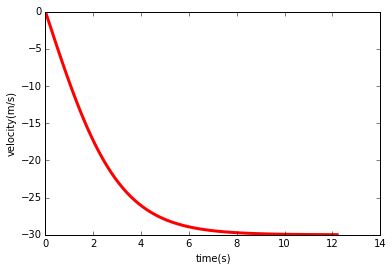

In [37]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
k2 = g*mass/vt**2  # drag coeff.

dt = 0.1           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print i,t_data[i], y_data[i], v_data[i]

pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

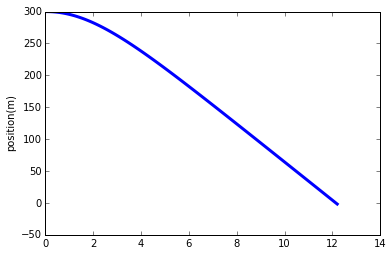

In [38]:
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.ylabel('position(m)');

### Exercise 1.5: Gravitational force 
According to Newton’s law of gravitation, the action of the
gravitational field of the earth on a particle is given by
$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$ where $y$ is measured
from the earth’s surface, $R$ is the earth’s radius, $G$ is the
gravitational constant, $M$ is the mass of the earth, and $g=GM/R^2$.
There is not simple analytical solution for this problem. Modify your
code to simulate the fall of a particle from an altitude $y_0$ with zero
initial velocity, and compute its speed when it hits the ground.
Determine the value of $y_0$ for which this impact velocity differs by
one percent from its value under a constant acceleration $g=9.8m/s^2$.
Take the radius of the earth to be $6.37\times 10^6m$.

### Challenge 1.2:

Modify the previous code to introduce the a gravitational force that depends on the position, and solve Exercise 1.5



### Exercise 1.6: Harmonic oscillator 

The two coupled first order equations
$$\frac{dy}{dt}=p; \frac{dp}{dt}=-4\pi ^2 y$$ define a harmonic
oscillator with period $T=1$. Compute the position $y$ and momentum $p$
as a function of time using a generalization of the previous code. Plot
the results for $y_0=1$ and $p_0$=0. Investigate the accuracy with which
the system returns to the initial state at integral values of $t$.



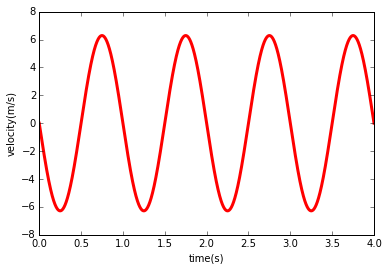

In [39]:
import math

y0 = 1
v0 = 0

p = particle(1., y0, v0)  # if the mass is m=1 then p = v (except for the units!)

tmax = 4.
dt = 0.0001
nsteps = int(tmax/dt)    #the arrays will have different size for different time steps

t = np.linspace(0.,tmax,nsteps) 
v = np.zeros(nsteps)
y = np.zeros(nsteps)
y[0] = y0

for i in range(1,nsteps):
#    p.euler(-4*math.pi**2*p.y, dt)
    p.euler_cromer(-4*math.pi**2*p.y,dt)
    t[i] = t[i-1]+dt
    v[i] = p.v
    y[i] = p.y
        
pyplot.plot(t, v, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

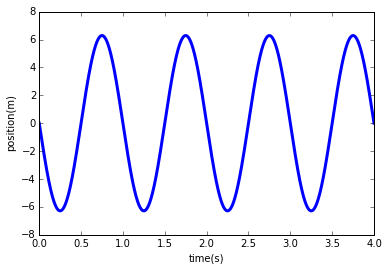

In [40]:
pyplot.plot(t, v, color="#0000FF", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('position(m)');

Two dimensional trajectories
----------------------------

In a 2d trajectory, the direction of the drag force is opposite to the
speed vector ${\bf v}$. Newton’s equations of motion for $x$ and $y$
components are written $$\begin{aligned}
&& m\frac{dv_x}{dt}=-F_dx; \\
&& m\frac{dv_y}{dt}=-mg-F_dy;\end{aligned}$$ Using $F_d=kv^2$,
$v_x=v\cos{\theta}$ and $v_y=v\sin{\theta}$, we find $$\begin{aligned}
&& \frac{dv_x}{dt}=-\frac{k}{m}vv_v, \\ 
&& \frac{dv_x}{dt}=-g-\frac{k}{m}vv_v, \end{aligned}$$ where
$v^2=v_x^2+v_y^2$. Hence, we cannot calculate the vertical motion of the
object without reference to the horizontal component.

![forces2](figures/forces2.png)
#### Object in a two dimensional trajectory under the effect of gravitational and dragging forces}


### Exercise 1.7: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.



In [23]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

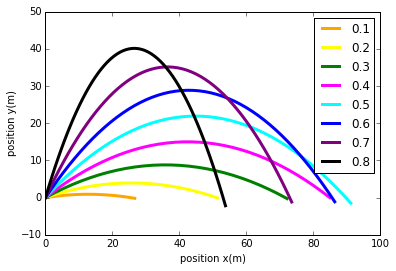

In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            # g acceleration
v0 = 30.           # initial velocity

dt = 0.1           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        fy = -g
        p.euler(0., fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

### Challenge 1.2: 

Modify the previous code to include the effect of drag resistance, and solve Exercise 1.7, part 2.

#### An introduction to animations with matplotlib


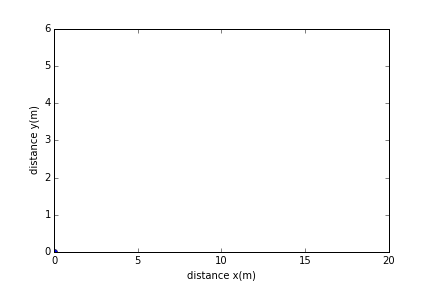
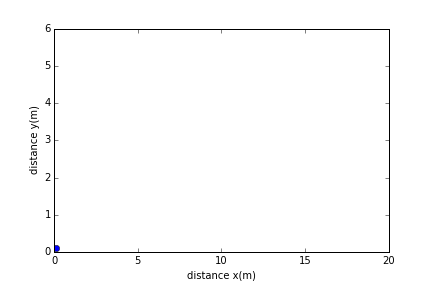
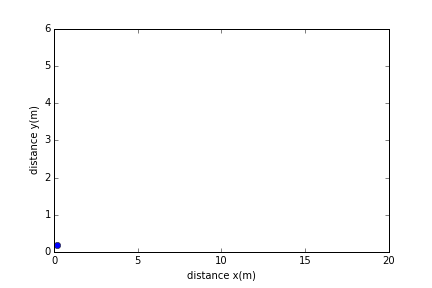
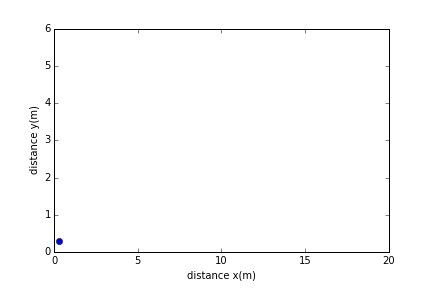
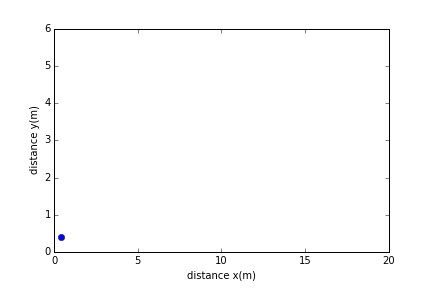
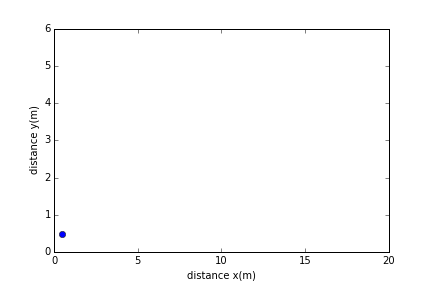
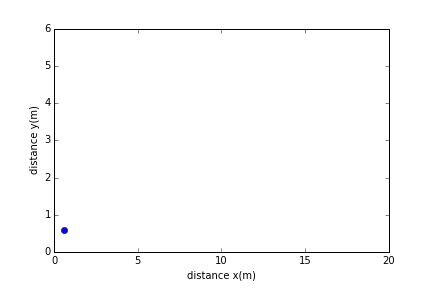
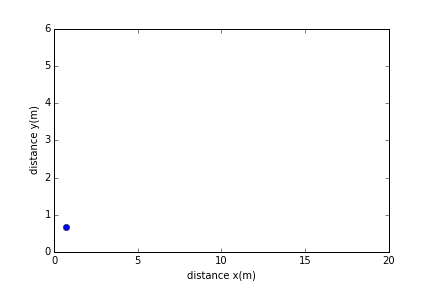
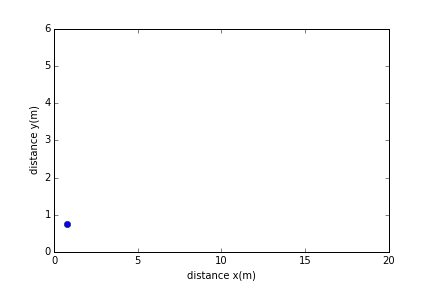
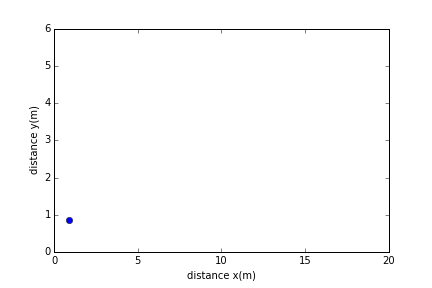
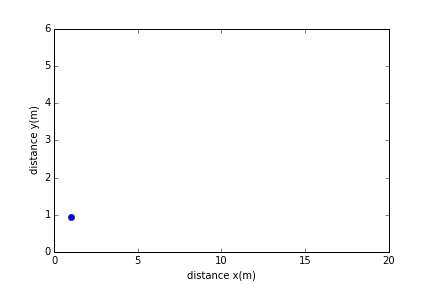
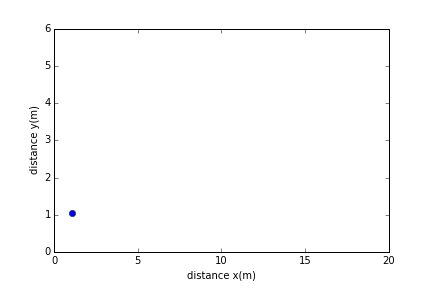
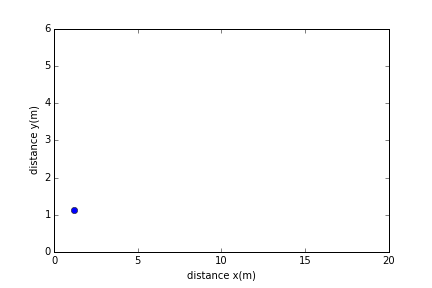
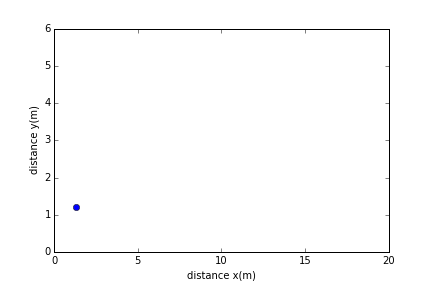
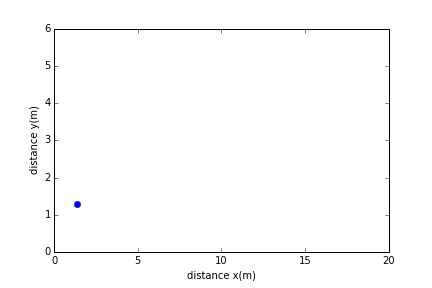
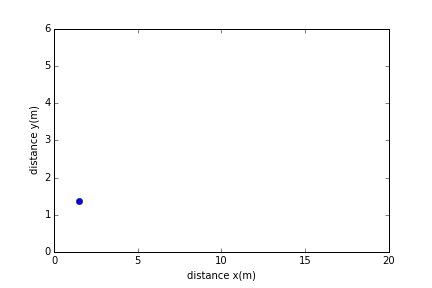
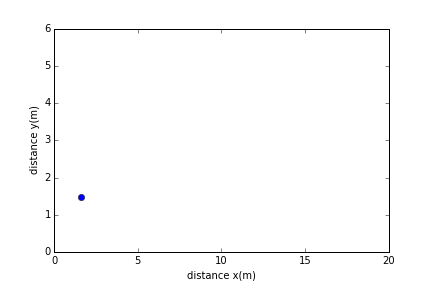
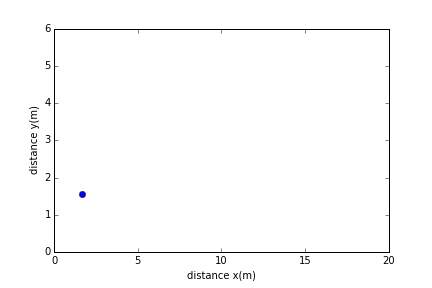
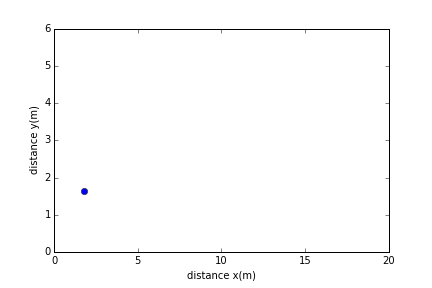
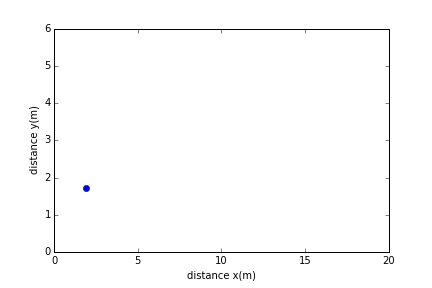
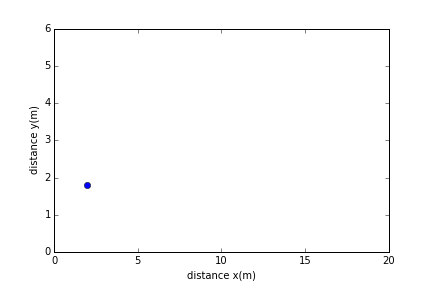
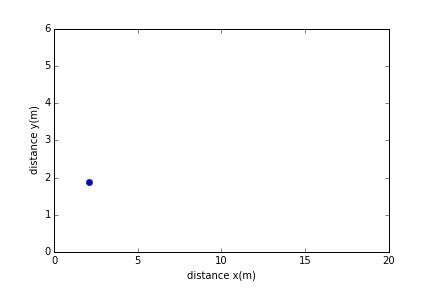
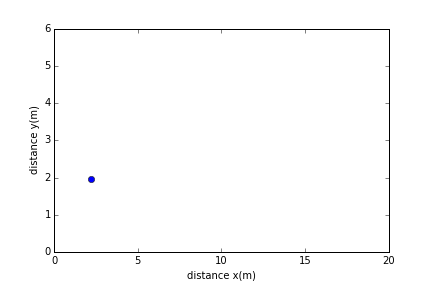
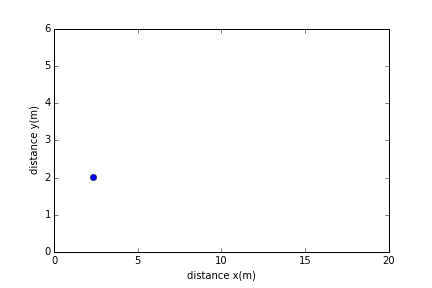
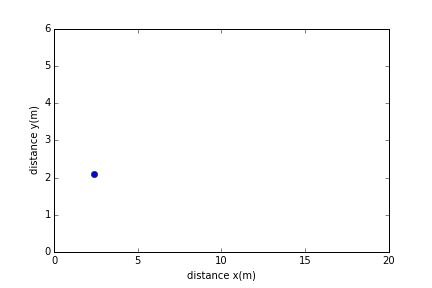
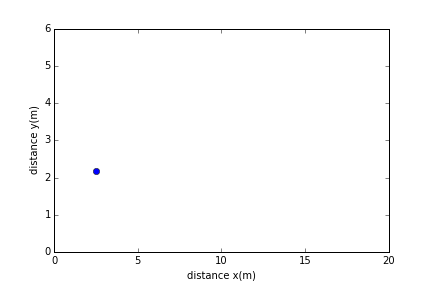
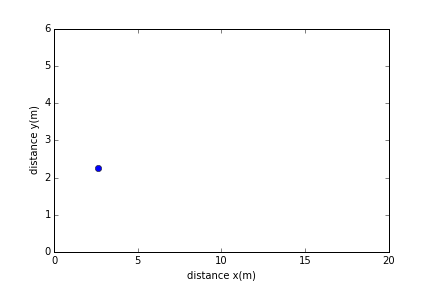
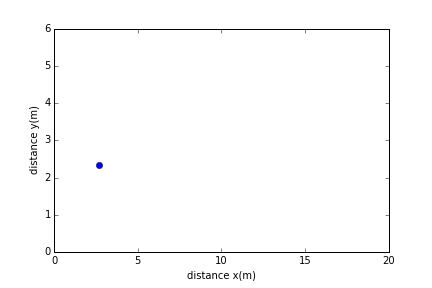
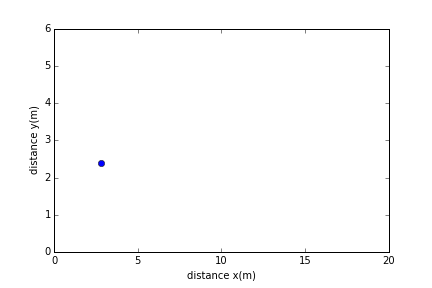
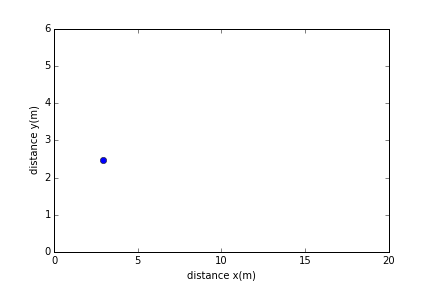
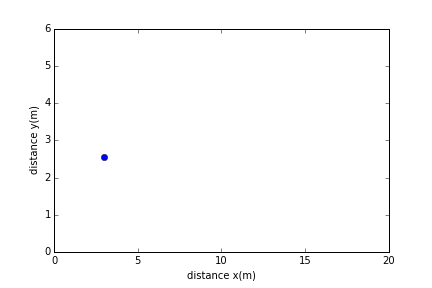
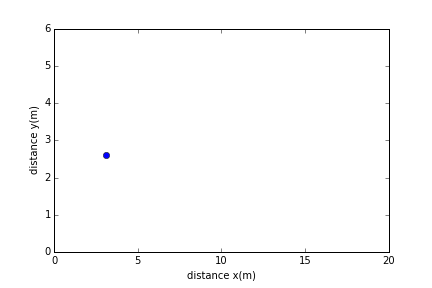
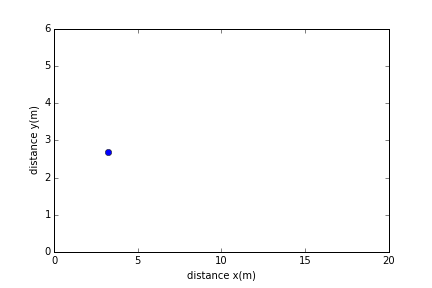
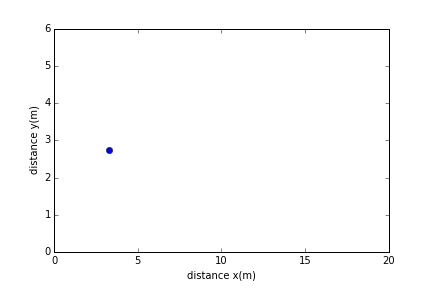
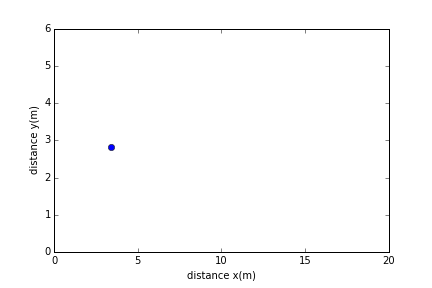
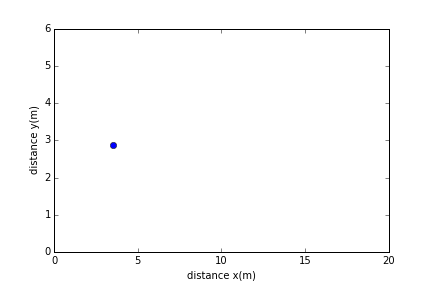
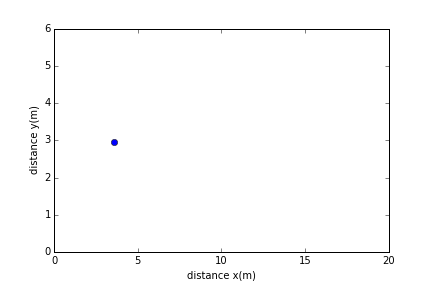
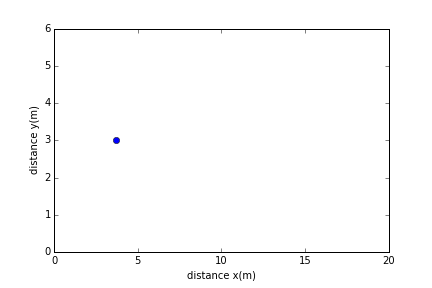
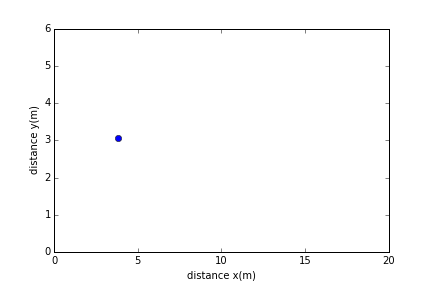
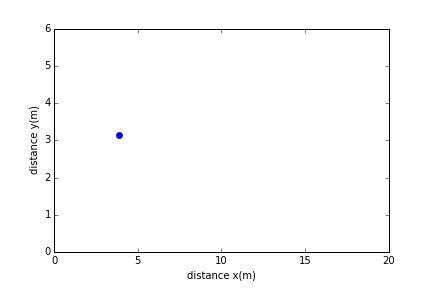
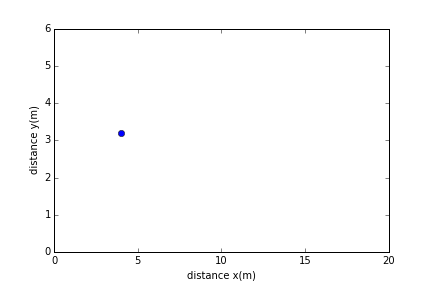
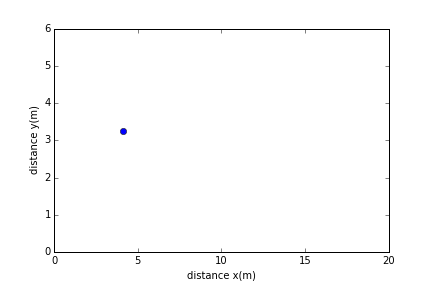
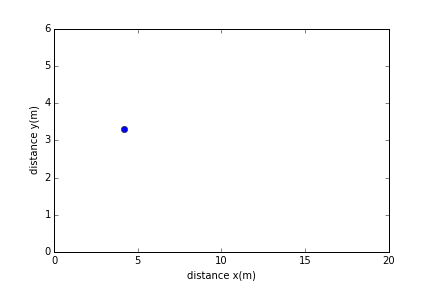
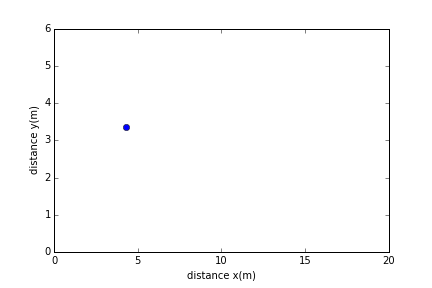
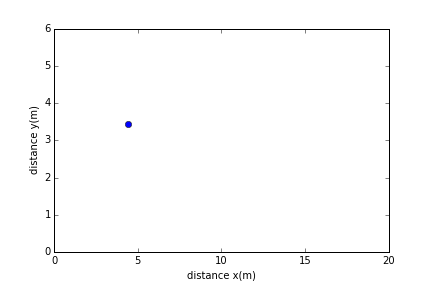
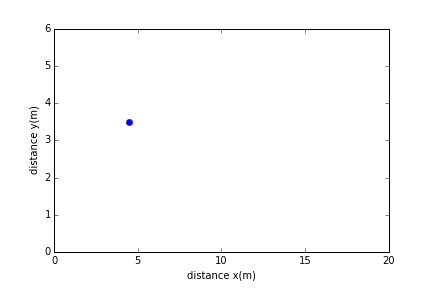
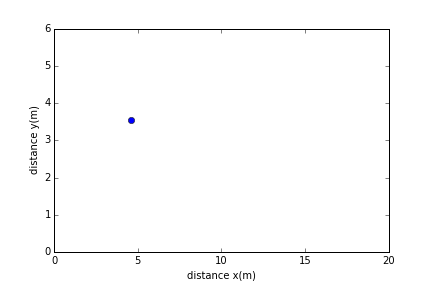
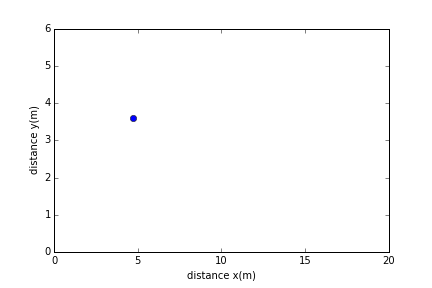
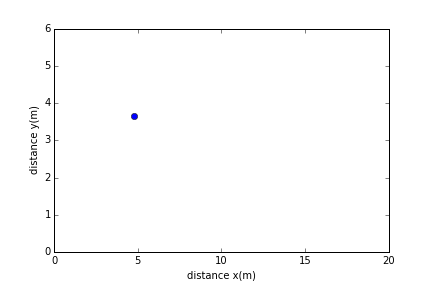
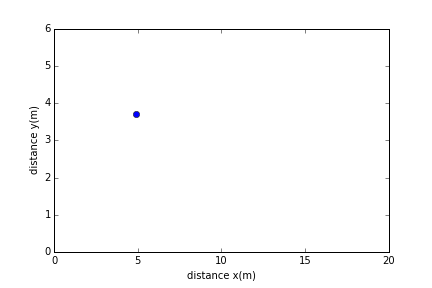
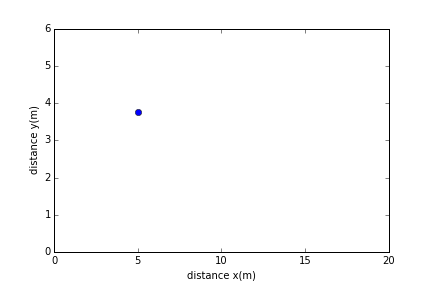
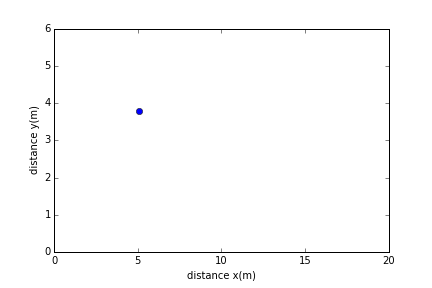
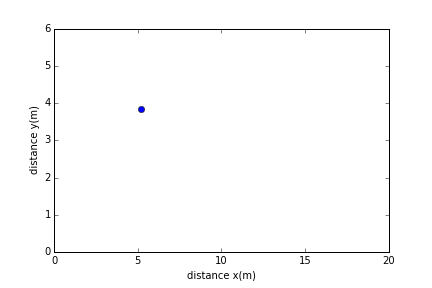
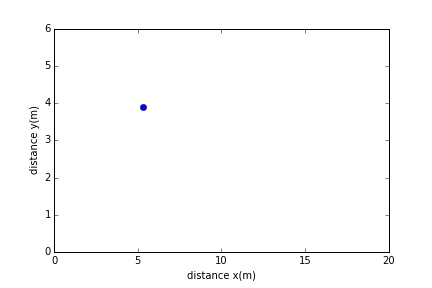
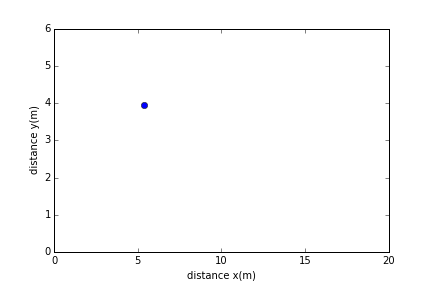
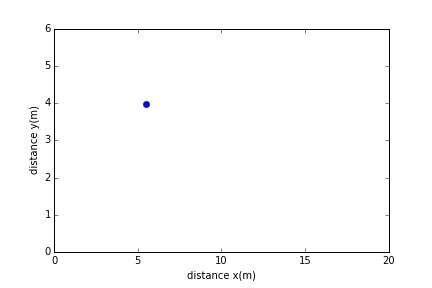
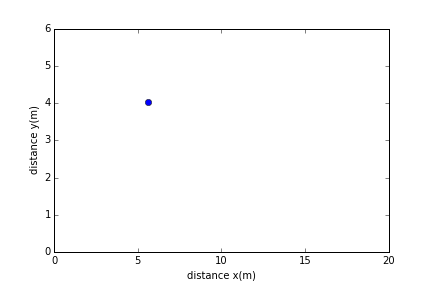
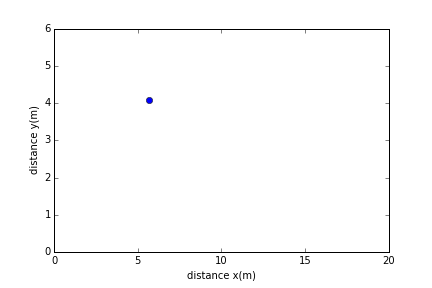
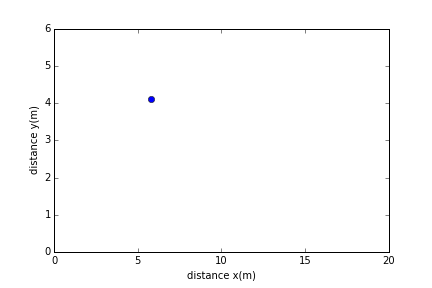
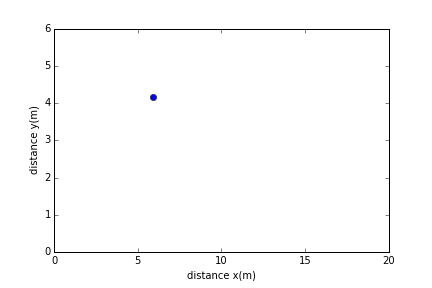
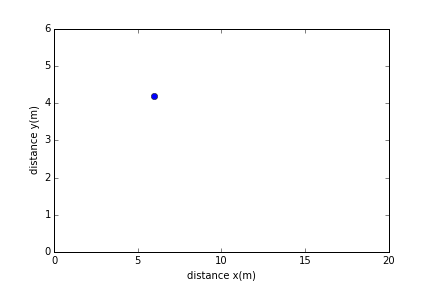
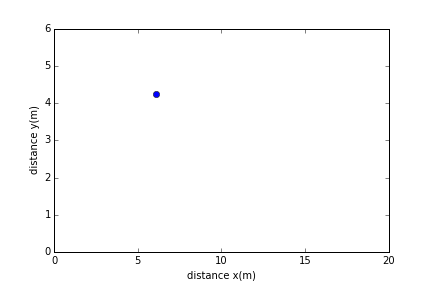
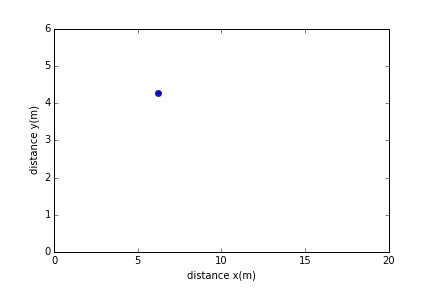
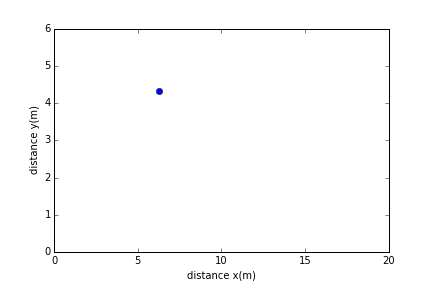
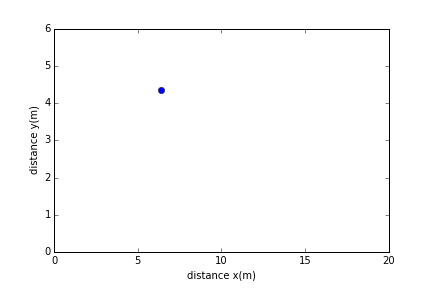
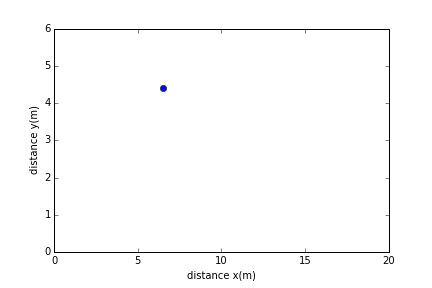
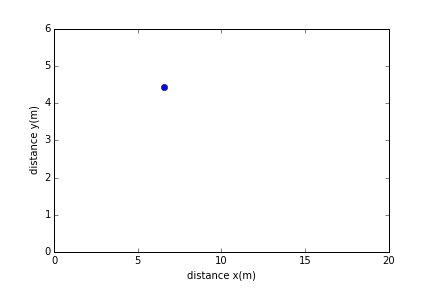
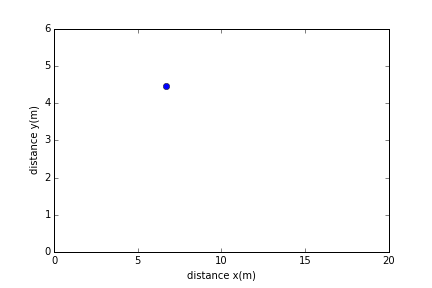
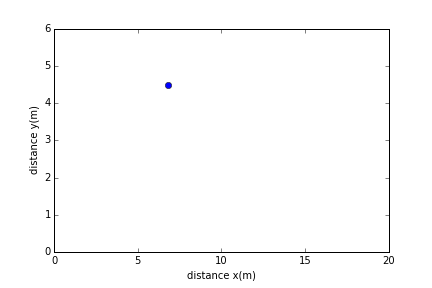
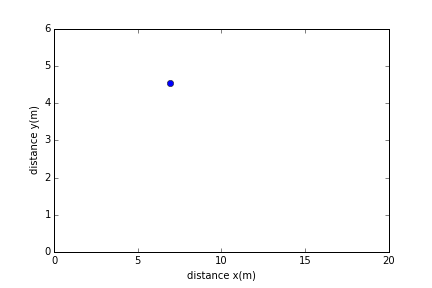
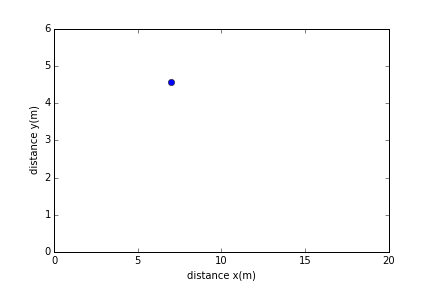
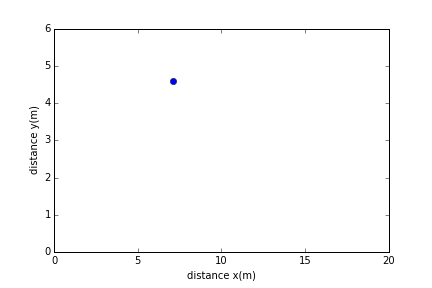
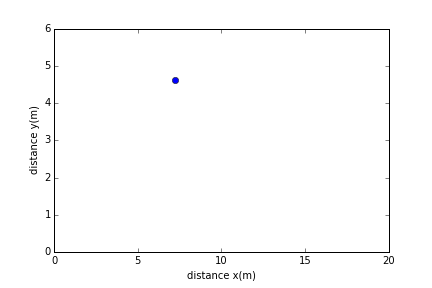
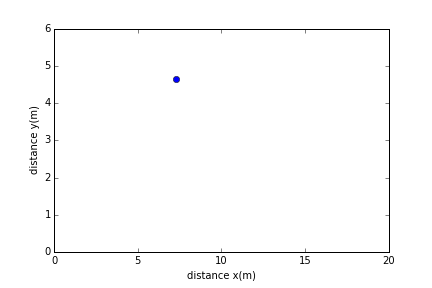
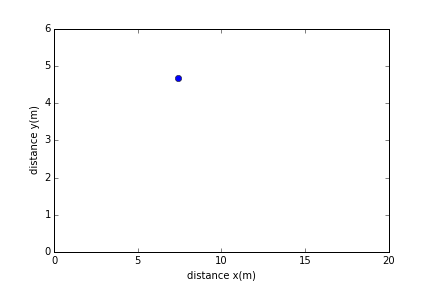
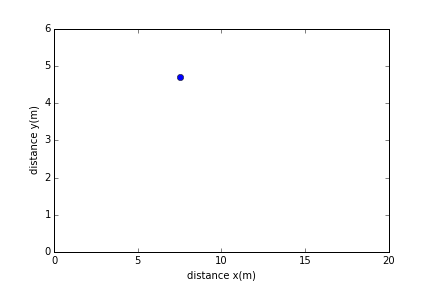
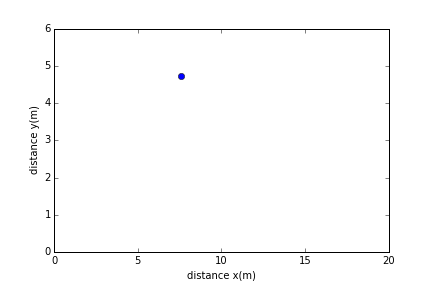
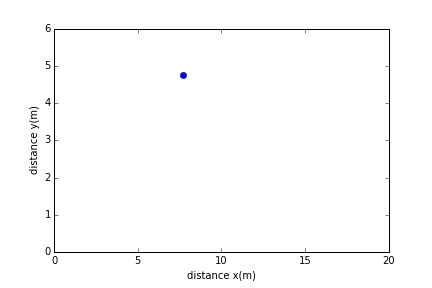
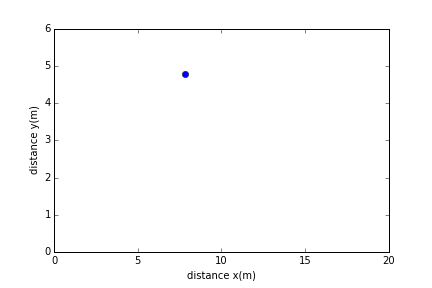
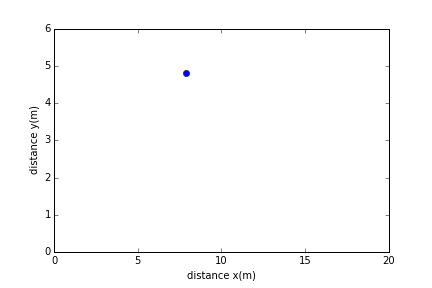
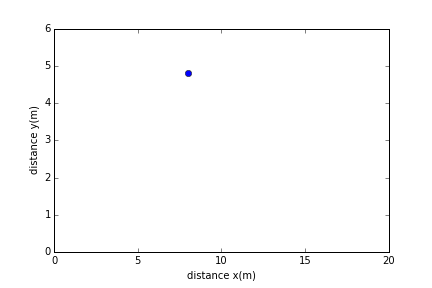
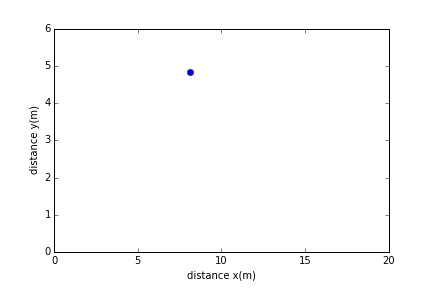
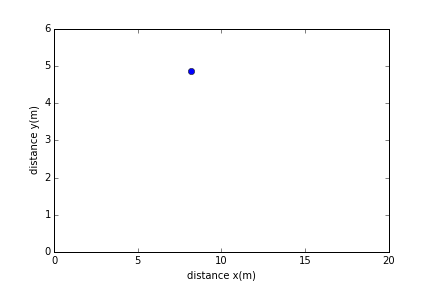
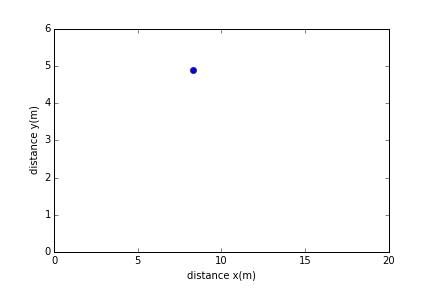
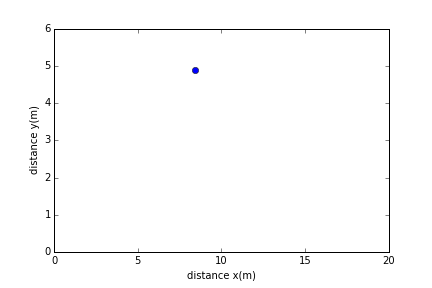
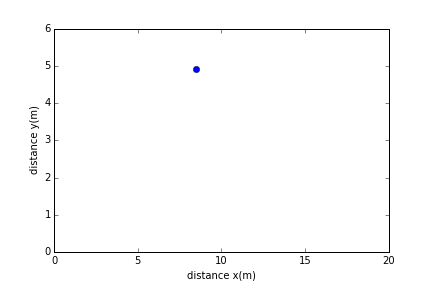
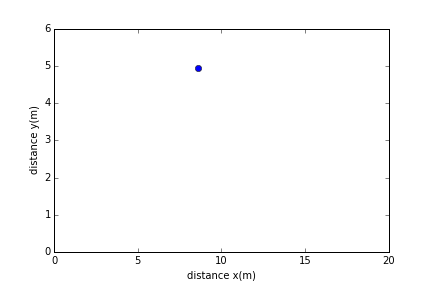
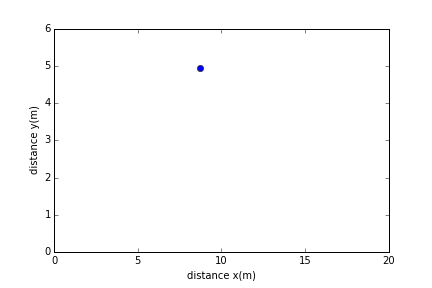
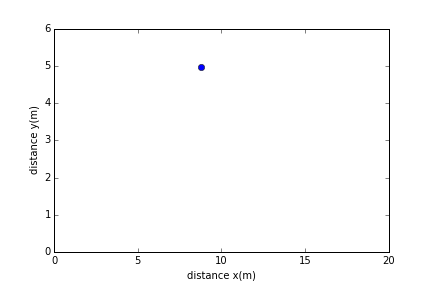
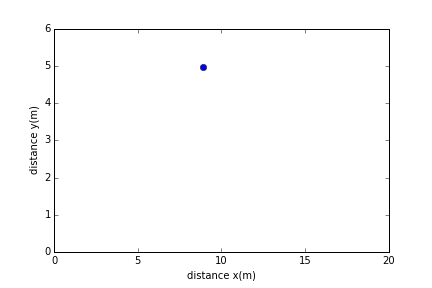
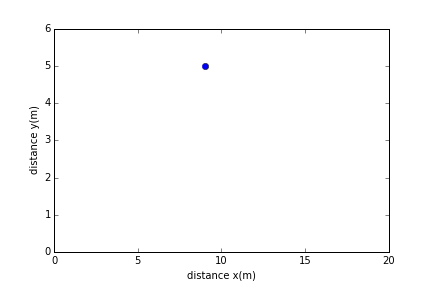
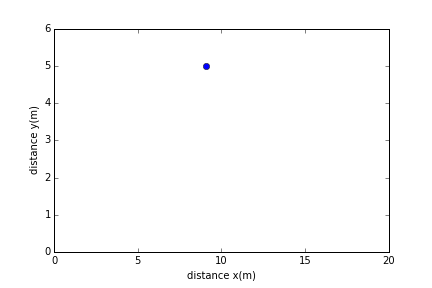
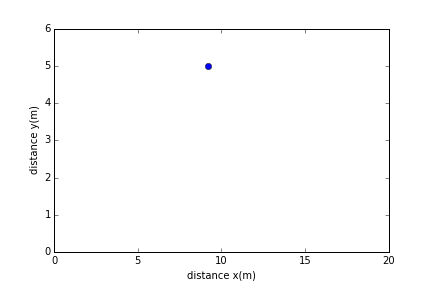
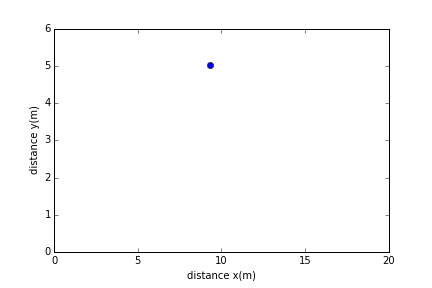
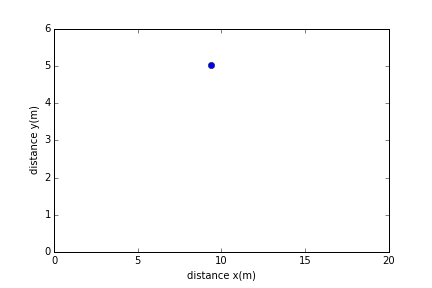
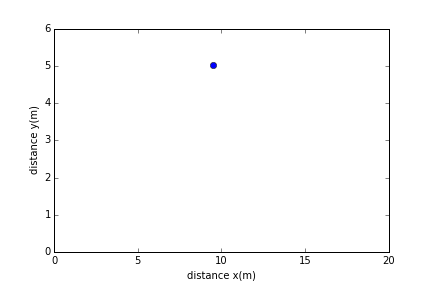
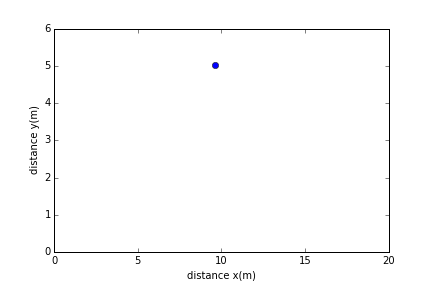
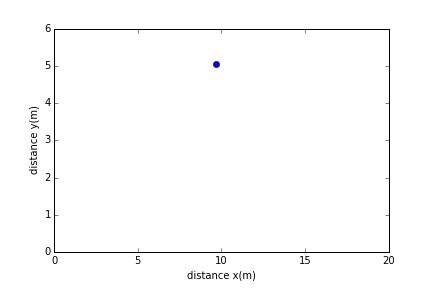
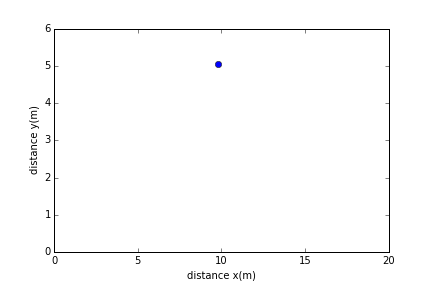
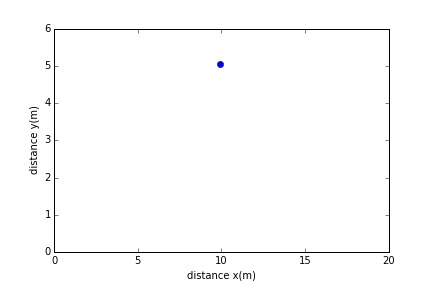
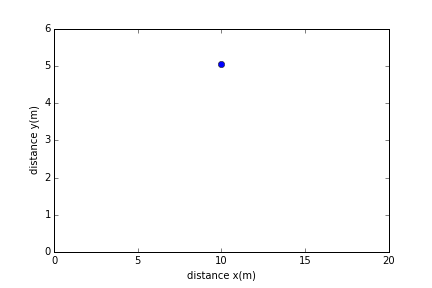
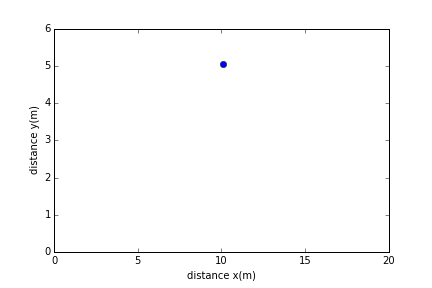
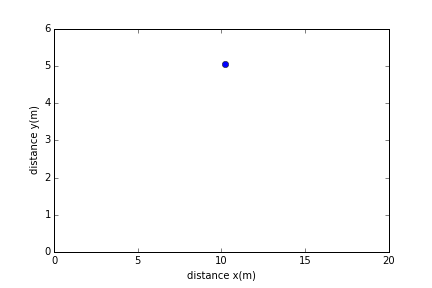
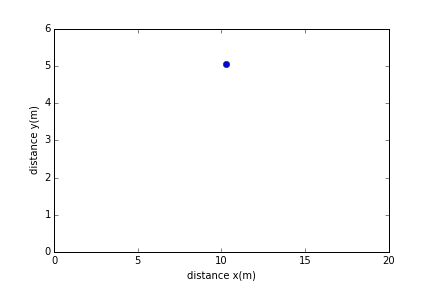
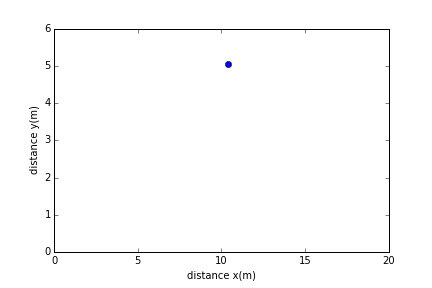
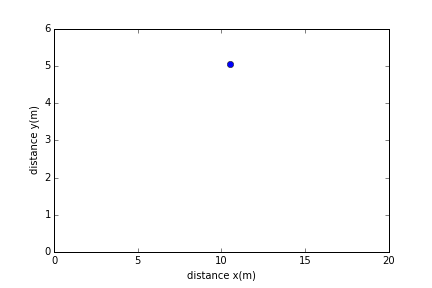
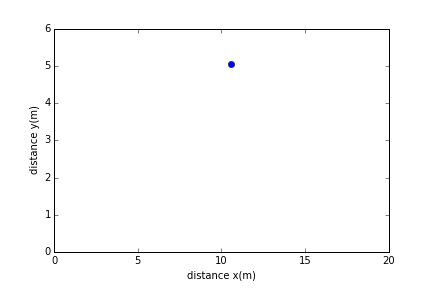
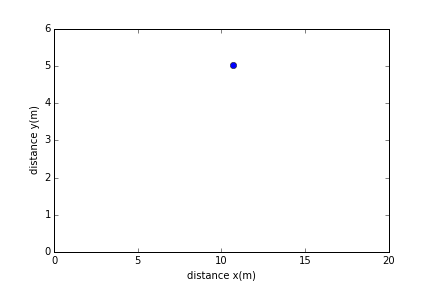
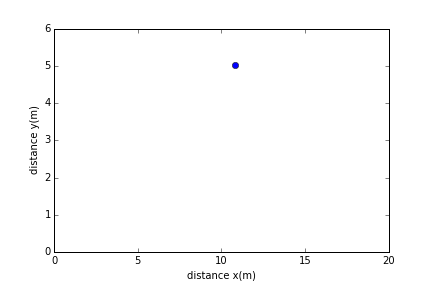
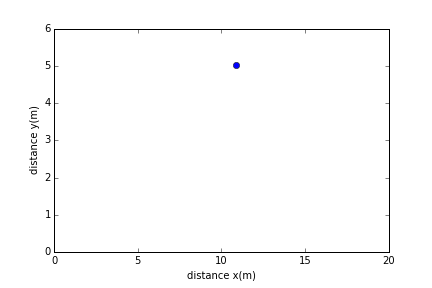
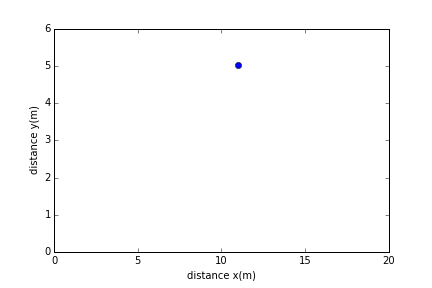
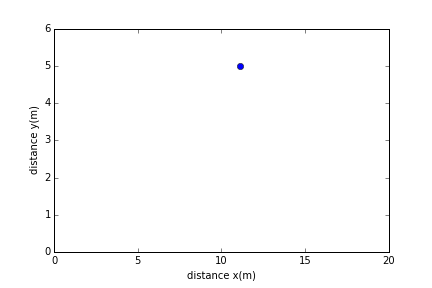
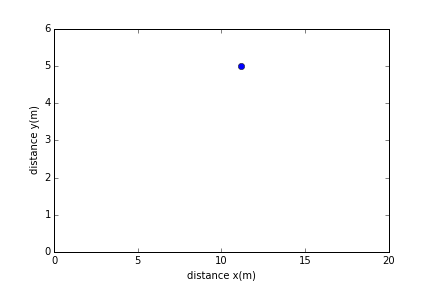
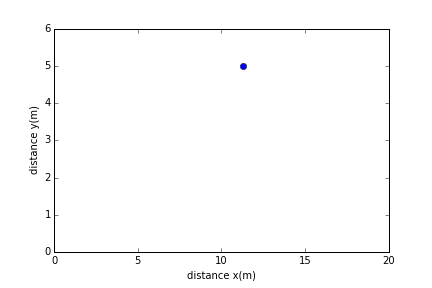
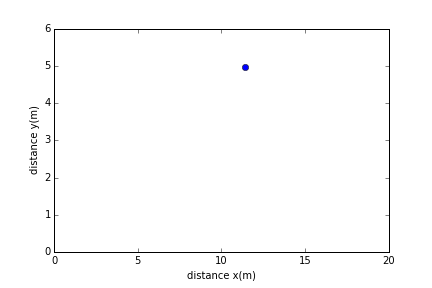
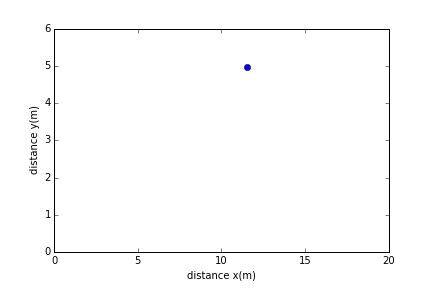
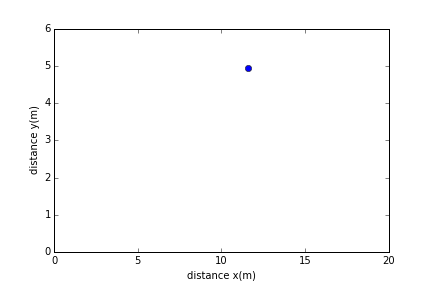
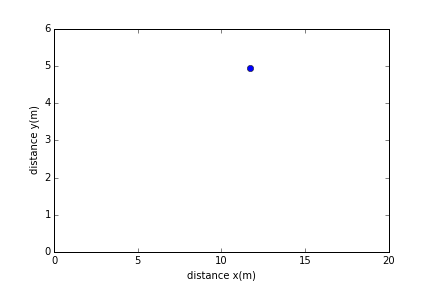
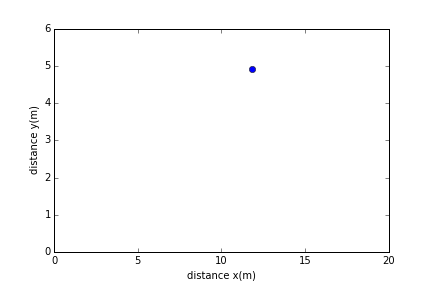
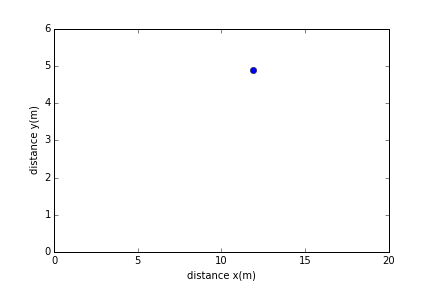
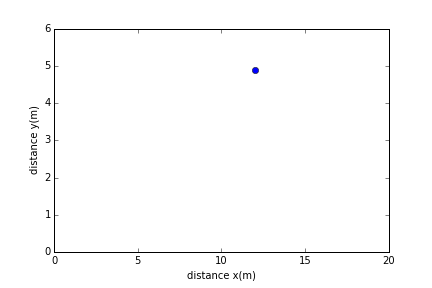
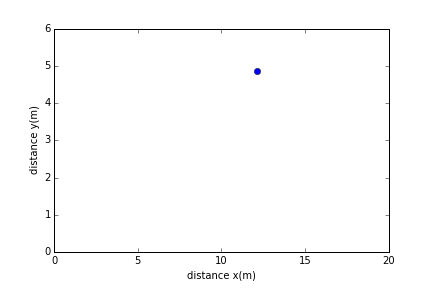
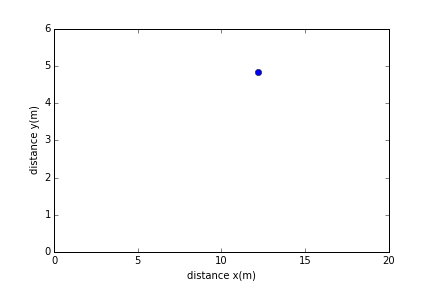
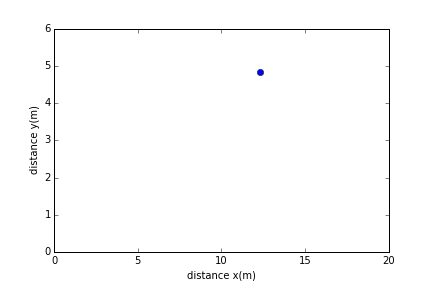
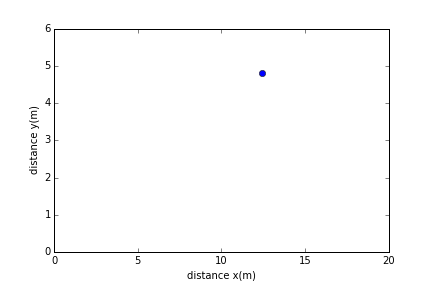
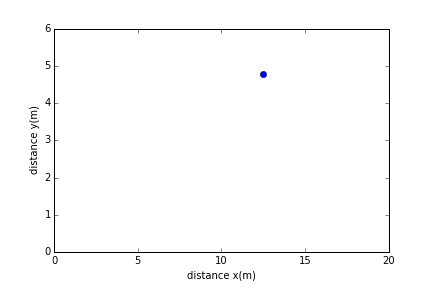
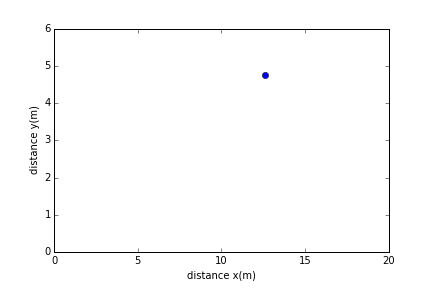
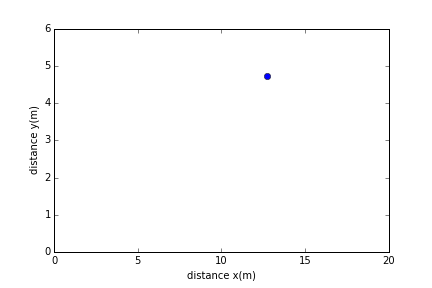
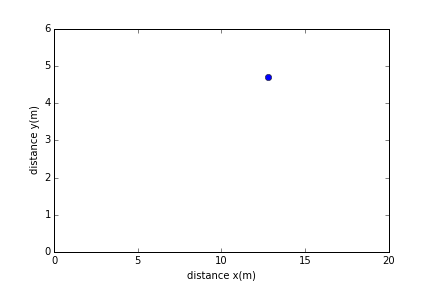
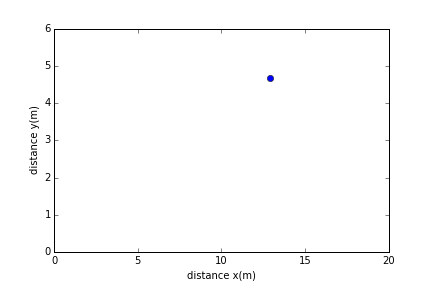
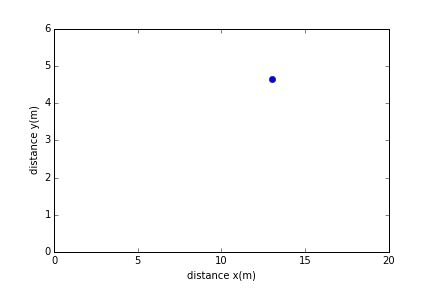
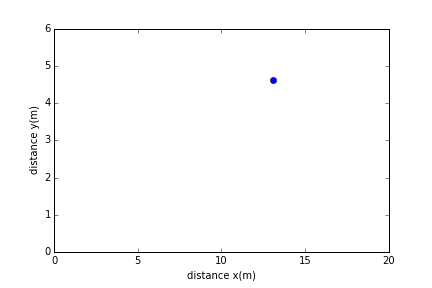
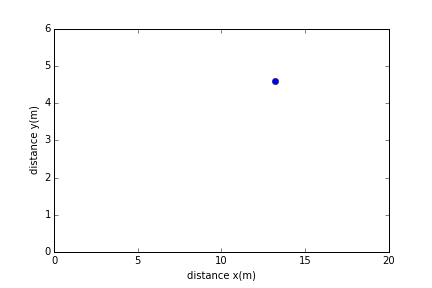
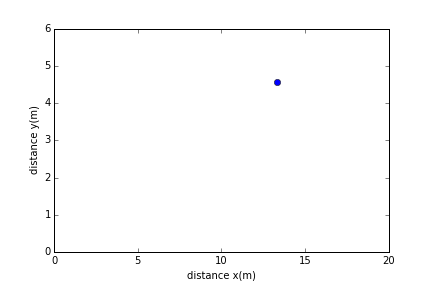
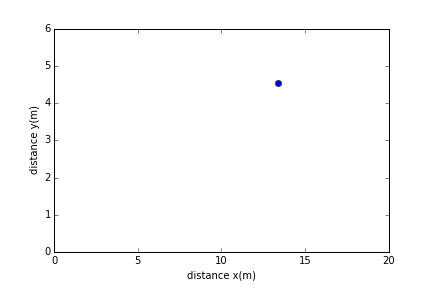
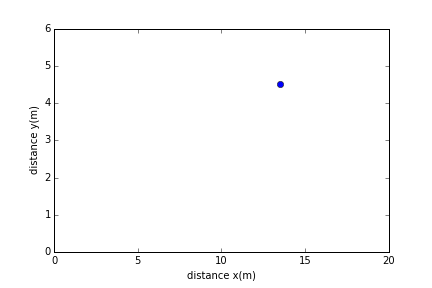
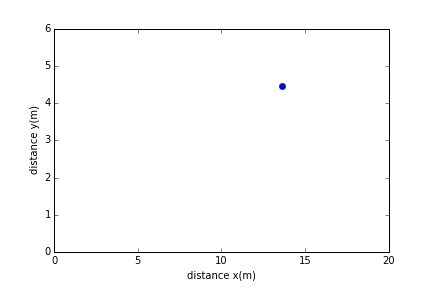
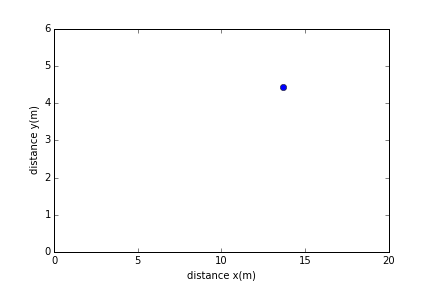
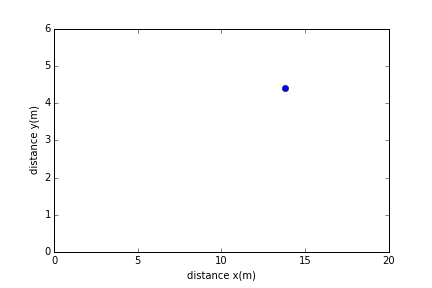
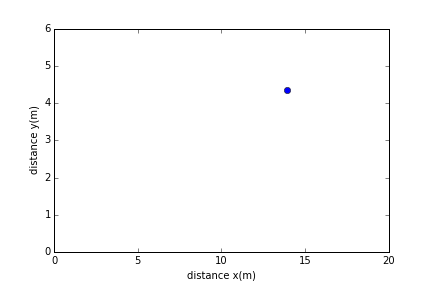
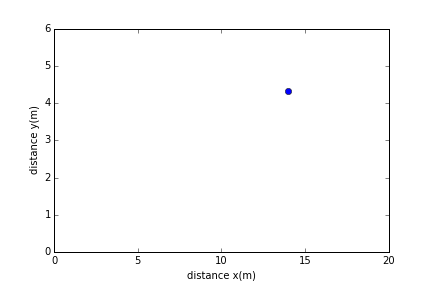
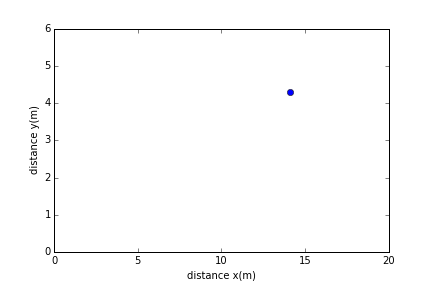
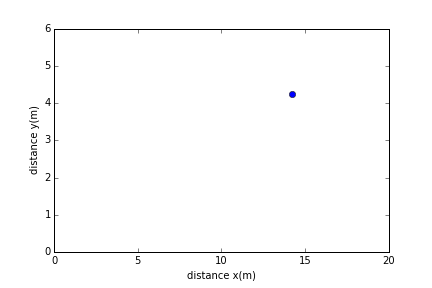
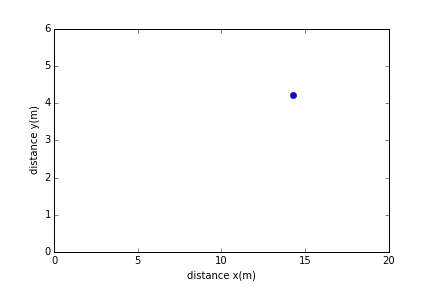
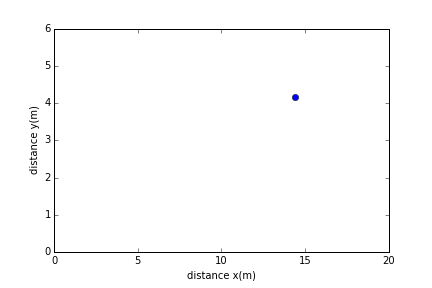
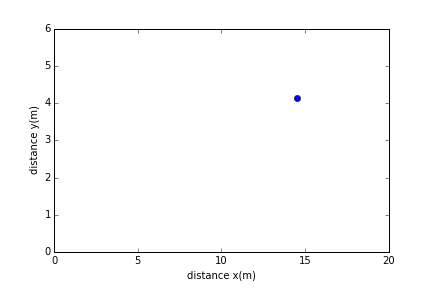
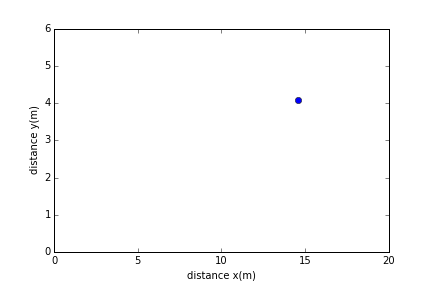
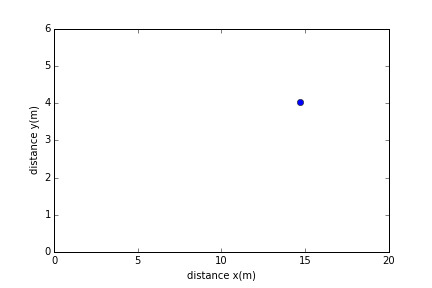
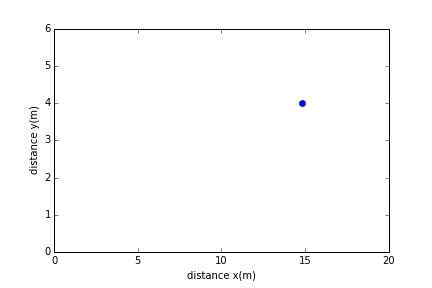
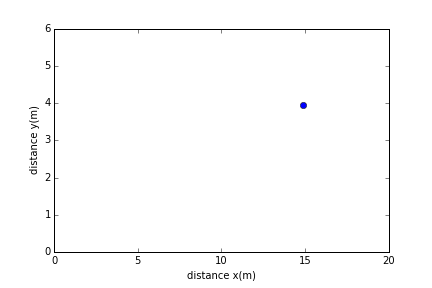
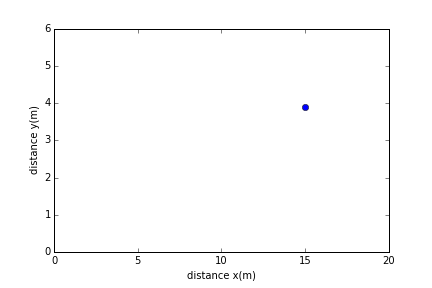
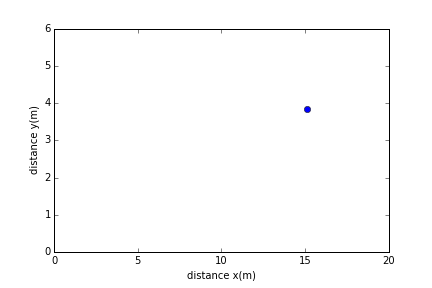
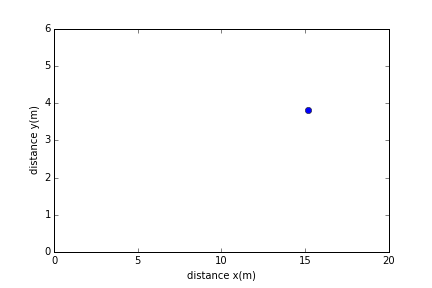
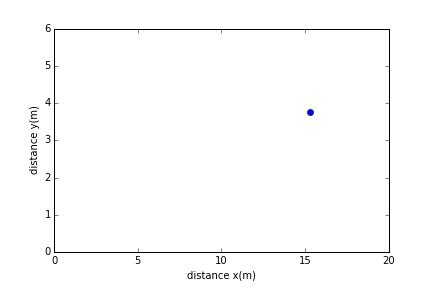
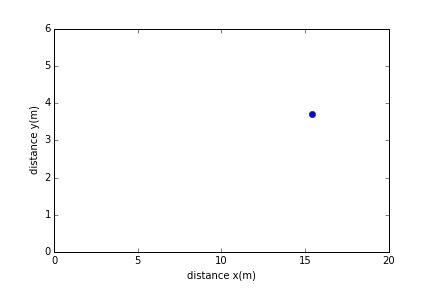
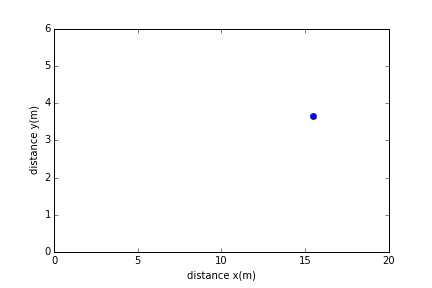
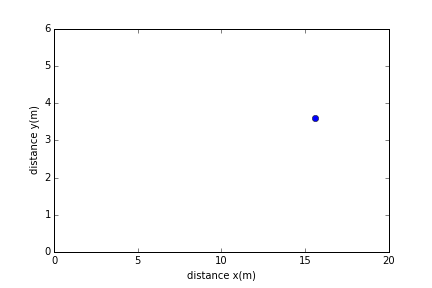
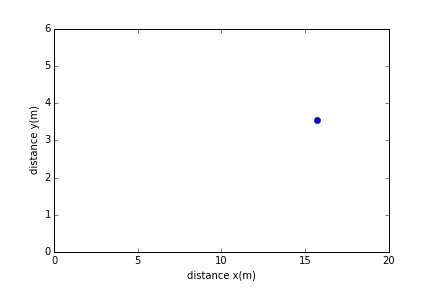
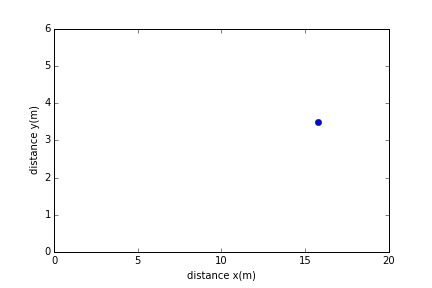
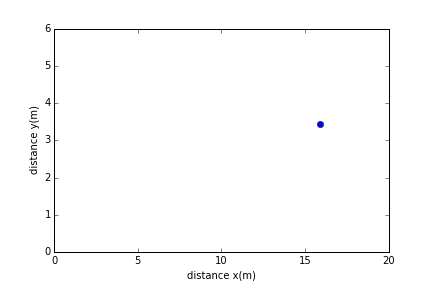
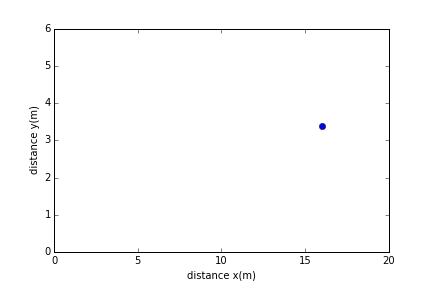
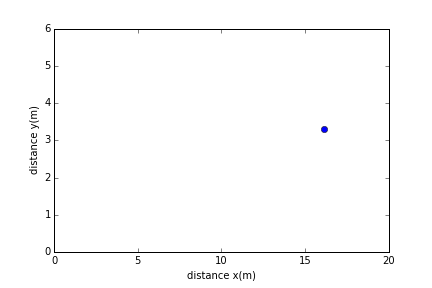
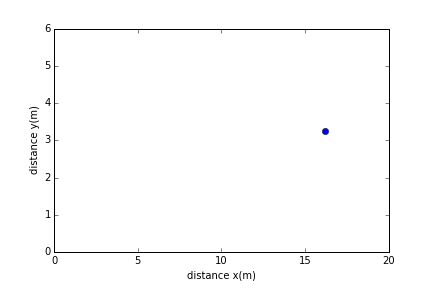
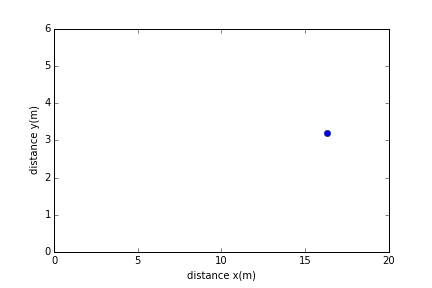
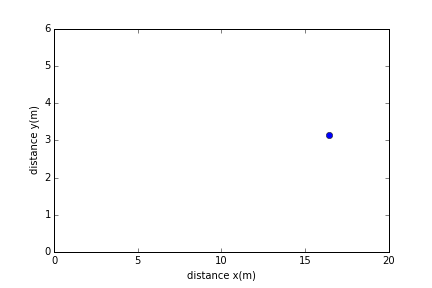
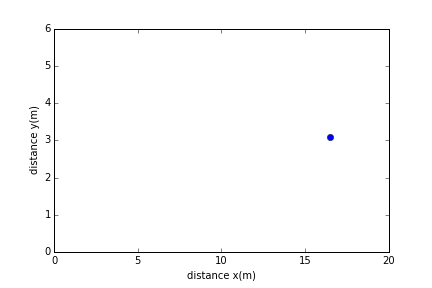
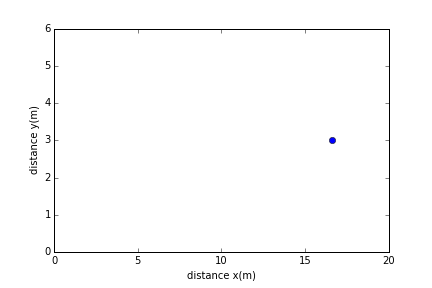
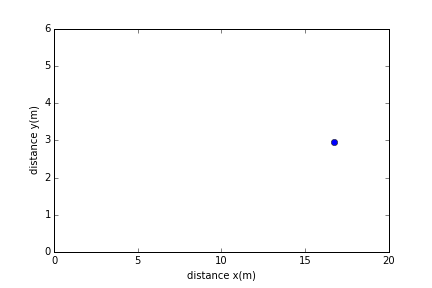
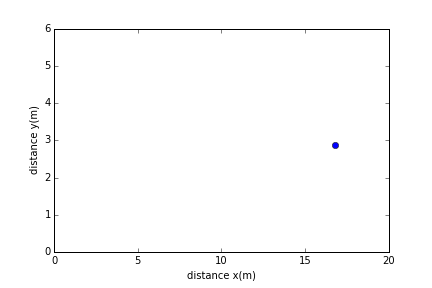
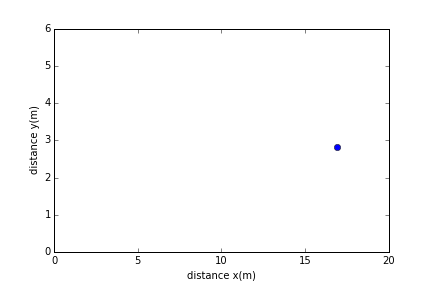
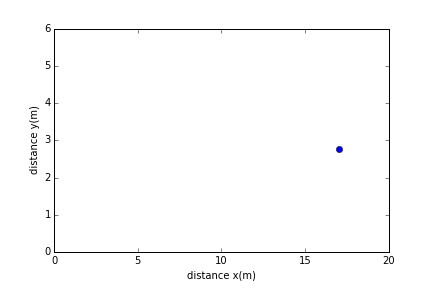
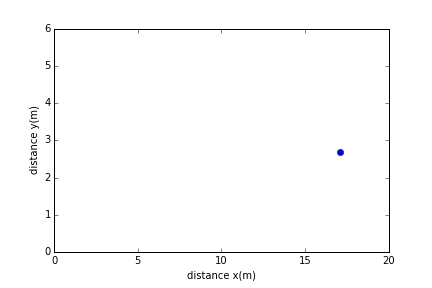
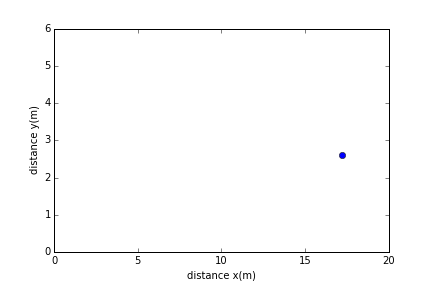
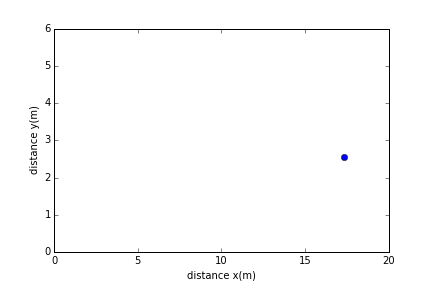
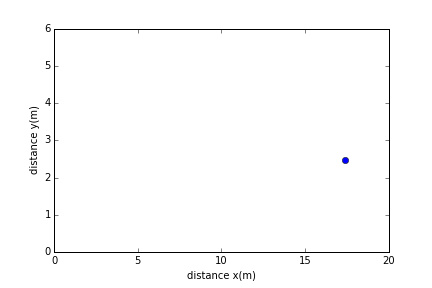
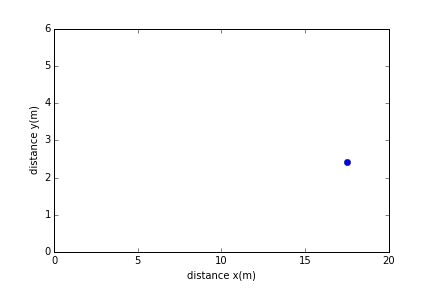
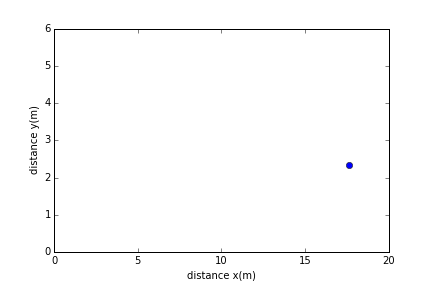
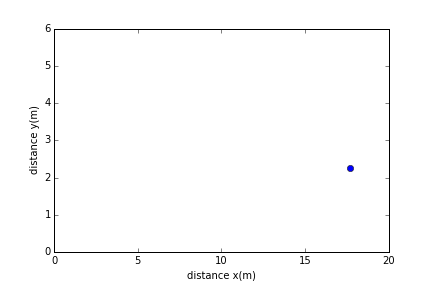
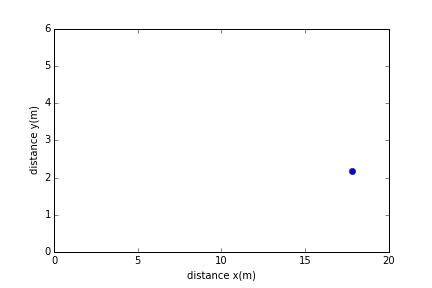
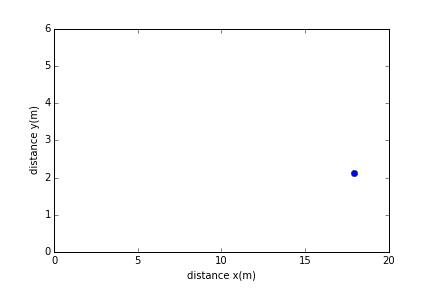
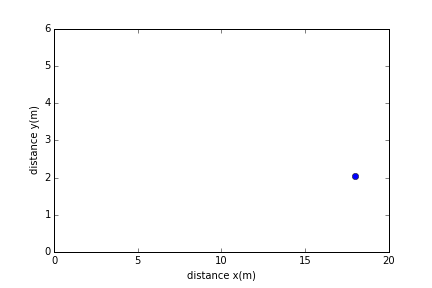
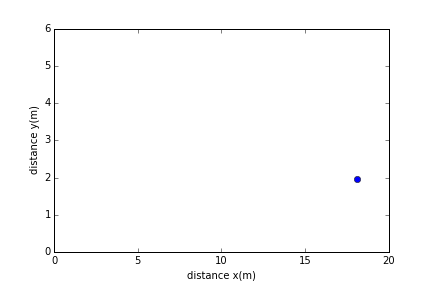
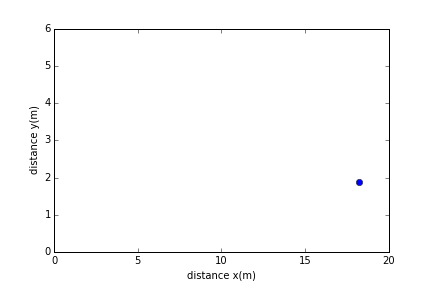
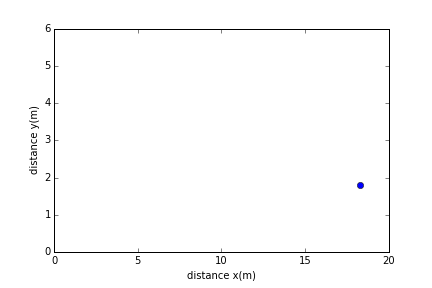
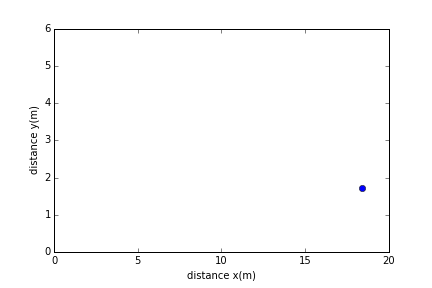
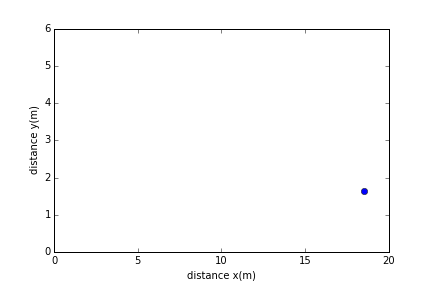
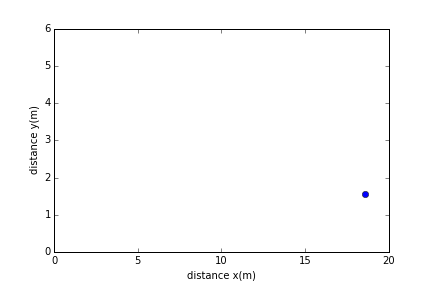
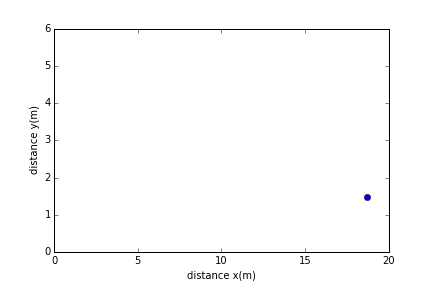
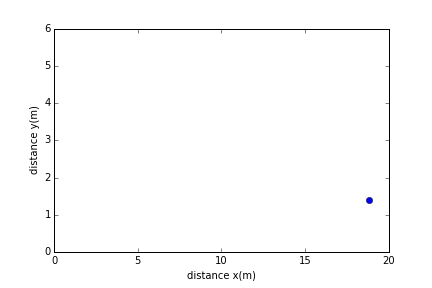
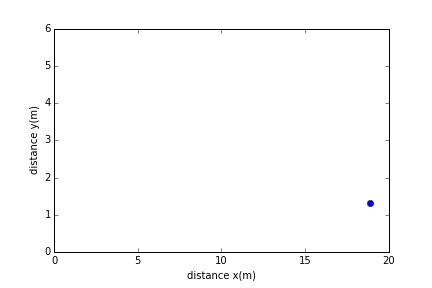
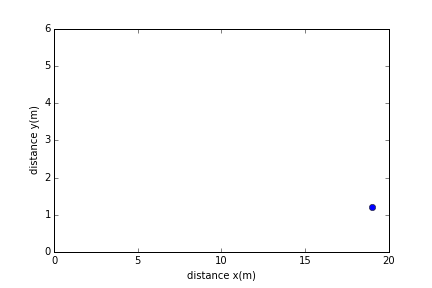
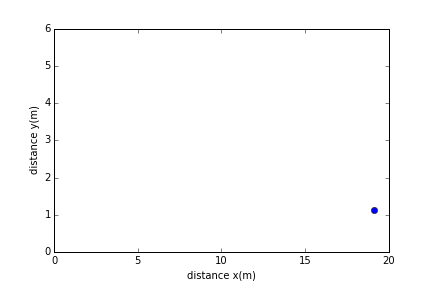
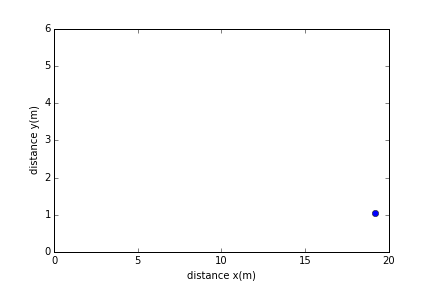
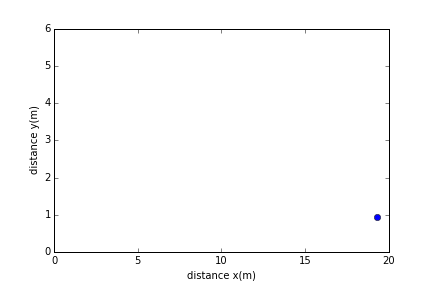
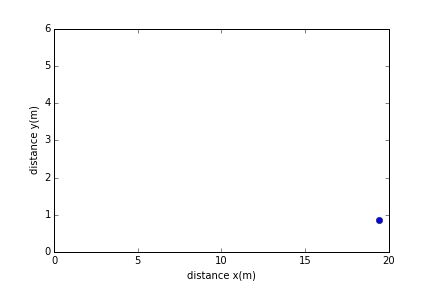
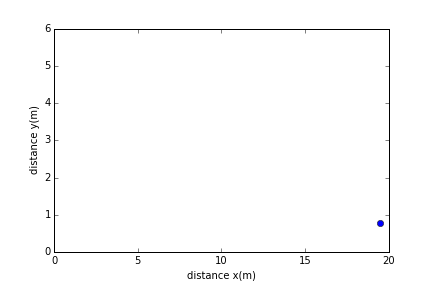
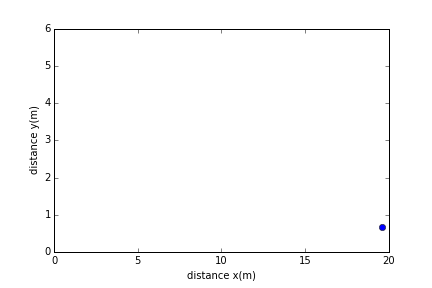
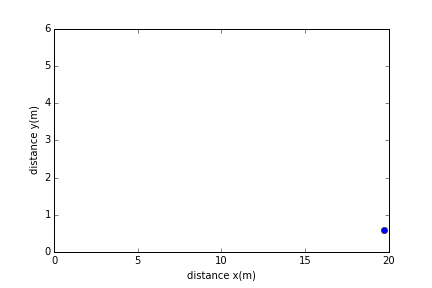
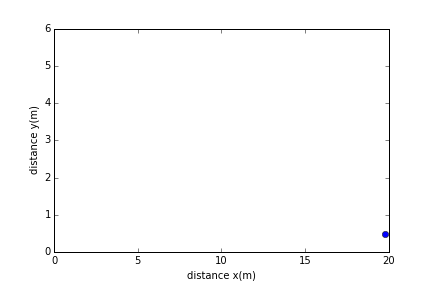
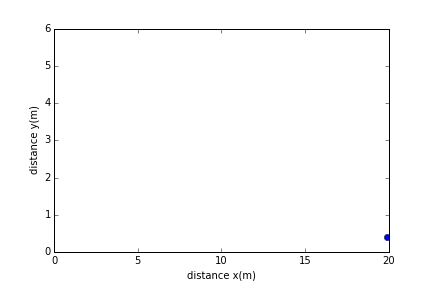

In [42]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

g = 9.8            # g acceleration
dt = 0.01           # time step

x = np.array([0.])
y = np.array([0.])

fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, 20), ylim=(0, 6), xlabel='distance x(m)', ylabel='distance y(m)')
points, = ax.plot([], [], marker='o', linestyle='None')

pyplot.legend()
p = particle2(1., 0., 0., 10., 10.)

def init():
    points.set_data(x, y)
    return points

def animate(i):
    if p.y >= 0 and i > 0:
        p.euler(0., -g, dt)
        x[0] = p.x
        y[0] = p.y
    points.set_data(x, y)
    return points

anim = animation.FuncAnimation(fig, animate, frames = 200, interval=10, blit=True)

display_animation(anim, default_mode='once')

Stability
---------

A major consideration in integrating differential equations is the
numerical stability of the algorithm used. Since we have replaced the
differential equation by a difference equation, we know that our results
will not be exact. Discrepancies will arise when using different step
sizes, for instance. This is the “truncation error” and depends on the
method employed. Other errors that do not originate in the method
correspond to the roundoffs performed by the computer, since it does not
work with real numbers, but with a finite number of digits determined by
the hardware. These roundoff errors will accumulate and can become
significant in some cases.

In practice we determine the accuracy of our solutions by reducing the
value of the step until the solutions unchanged at the desired level of
accuracy.

In addition to accuracy, another important factor is the stability of
the algorithm. For instance, it may occur that the numerical results are
very good for short times, but diverge from the “true” solution for
longer times. Such an algorithm is said to be “unstable” for the
particular problem.





